In [1]:
import numpy as np 
import gvar as gv
import h5py as h5

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import *
from lametlat.utils.constants import *
from lametlat.preprocess.read_raw import pt2_to_meff

a = 0.06

In [2]:
data_path = "output/c4864_hyp_proton_PDF.h5"
# data_path = "output/S8T32_Cg5_proton_PDF.h5"

# read data
f = h5.File(data_path, 'r')

# read 2pt data
pt2_real = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['real'][:] + f['2pt']['px0_py0_pz0_pt0']['gamma_T']['real'][:])/4
pt2_imag = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['imag'][:] + f['2pt']['px0_py0_pz0_pt0']['gamma_T']['imag'][:])/4

pt2_real_jk = jackknife(pt2_real)
pt2_imag_jk = jackknife(pt2_imag)

pt2_real_jk_avg = jk_ls_avg(pt2_real_jk)
pt2_imag_jk_avg = jk_ls_avg(pt2_imag_jk)

print(np.shape(pt2_real_jk_avg))
print(pt2_real_jk_avg[:])


(64,)
[-0.39541(25) -0.0042984(81) -0.00011511(53) -5.815(79)e-06 -7.18(23)e-07
 -1.857(89)e-07 -7.11(40)e-08 -3.30(20)e-08 -1.72(11)e-08 -9.67(70)e-09
 -5.65(42)e-09 -3.41(27)e-09 -2.11(17)e-09 -1.31(12)e-09 -8.20(76)e-10
 -5.06(49)e-10 -3.10(31)e-10 -1.90(20)e-10 -1.17(13)e-10 -7.27(88)e-11
 -4.50(60)e-11 -2.84(44)e-11 -1.82(33)e-11 -1.18(25)e-11 -7.5(1.8)e-12
 -4.5(1.1)e-12 -2.69(68)e-12 -1.61(43)e-12 -9.9(2.8)e-13 -6.1(1.9)e-13
 -4.0(1.4)e-13 -2.8(1.1)e-13 -2.04(81)e-13 -1.52(65)e-13 -1.06(50)e-13
 -6.6(4.2)e-14 -3.7(3.9)e-14 -1.6(3.9)e-14 0.3(5.1)e-14 0.7(8.3)e-14
 0.2(1.3)e-13 -0.2(1.9)e-13 -1.9(2.6)e-13 -5.6(3.7)e-13 -1.41(51)e-12
 -3.04(76)e-12 -5.9(1.2)e-12 -1.09(21)e-11 -1.92(35)e-11 -3.41(58)e-11
 -5.73(84)e-11 -9.8(1.2)e-11 -1.76(18)e-10 -3.21(31)e-10 -6.07(56)e-10
 -1.19(11)e-09 -2.47(21)e-09 -5.85(43)e-09 -1.59(10)e-08 -5.23(27)e-08
 -2.271(83)e-07 -1.507(34)e-06 -2.028(21)e-05 -0.0005761(21)]


/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in log
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.
/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in sqrt
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.


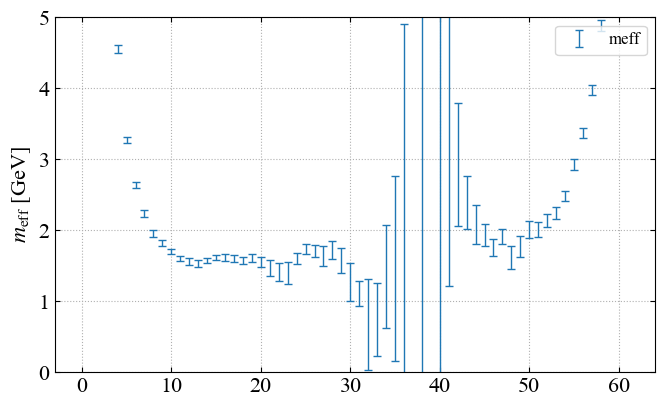

In [3]:
meff = pt2_to_meff(pt2_real_jk_avg, boundary="periodic") / a * GEV_FM

fig, ax = default_plot()
ax.errorbar(np.arange(len(meff)), gv.mean(meff), gv.sdev(meff), label='meff', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
ax.set_ylabel(r"$m_{\rm eff}$ [GeV]", **fs_p)
ax.set_ylim(0, 5)
plt.tight_layout()
plt.show()

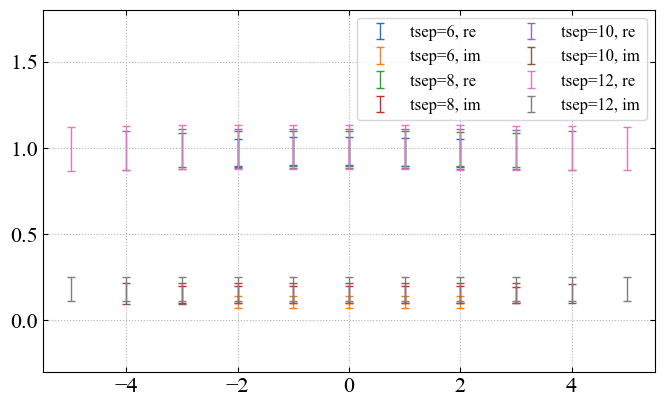

In [4]:
z = 0
tau_cut = 1

fig, ax = default_plot()

for tsep in [6, 8, 10, 12]:
    # read 3pt data
    pt3_real = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['real']
    pt3_imag = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['imag']

    pt3_real_jk = jackknife(pt3_real)
    pt3_imag_jk = jackknife(pt3_imag)

    pt3_real_jk_avg = jk_ls_avg(pt3_real_jk)
    pt3_imag_jk_avg = jk_ls_avg(pt3_imag_jk)

    ratio_re = - pt3_real_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]
    ratio_im = - pt3_imag_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]

    tau_ls = np.arange(tau_cut, tsep+1-tau_cut) - tsep/2

    ax.errorbar(tau_ls, gv.mean(ratio_re), gv.sdev(ratio_re), label=f'tsep={tsep}, re', **errorb)
    ax.errorbar(tau_ls, gv.mean(ratio_im), gv.sdev(ratio_im), label=f'tsep={tsep}, im', **errorb)

ax.legend(loc="upper right", ncol=2, **fs_small_p)
ax.set_ylim(-0.3, 1.8)
plt.tight_layout()
plt.show()


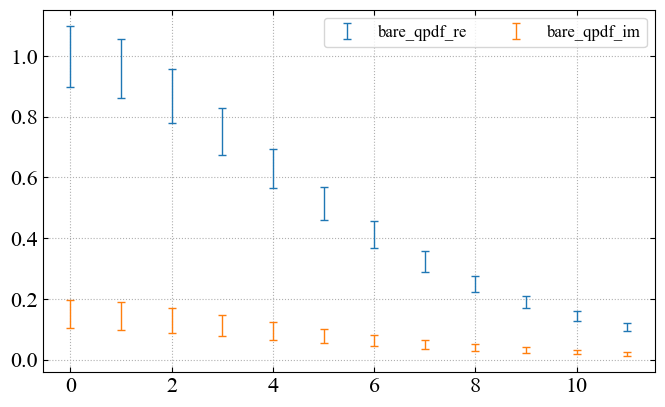

In [5]:
tsep = 8

bare_qpdf_re = []
bare_qpdf_im = []

for z in range(12):
    pt3_real = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['real']
    pt3_imag = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['imag']
    
    pt3_real_jk = jackknife(pt3_real)
    pt3_imag_jk = jackknife(pt3_imag)
    
    pt3_real_jk_avg = jk_ls_avg(pt3_real_jk)
    pt3_imag_jk_avg = jk_ls_avg(pt3_imag_jk)
    
    ratio_re = - pt3_real_jk_avg[int(tsep / 2)] / pt2_real_jk_avg[tsep]
    ratio_im = - pt3_imag_jk_avg[int(tsep / 2)] / pt2_real_jk_avg[tsep]
    
    bare_qpdf_re.append(ratio_re)
    bare_qpdf_im.append(ratio_im)
    
# bare_qpdf_re = np.array(bare_qpdf_re) / gv.mean(bare_qpdf_re[0])
# bare_qpdf_im = np.array(bare_qpdf_im) / gv.mean(bare_qpdf_re[0])
    
fig, ax = default_plot()
ax.errorbar(np.arange(len(bare_qpdf_re)), gv.mean(bare_qpdf_re), gv.sdev(bare_qpdf_re), label='bare_qpdf_re', **errorb)
ax.errorbar(np.arange(len(bare_qpdf_im)), gv.mean(bare_qpdf_im), gv.sdev(bare_qpdf_im), label='bare_qpdf_im', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()
    